# EEG Eye State

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
import timeit

from sklearn.svm import SVC
from keras.layers import Dense
from keras.models import Sequential
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Using TensorFlow backend.


In [2]:

df_raw = pd.read_csv("EEG Eye State.csv")
df_raw.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [3]:
# it counts the number of null in rows for each column
df_raw.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

In [4]:
# it counts the number of na in rows for each column
df_raw.isna().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

we dont have to handle missing data because there is no missing data. As in the above. 

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
AF3             14980 non-null float64
F7              14980 non-null float64
F3              14980 non-null float64
FC5             14980 non-null float64
T7              14980 non-null float64
P7              14980 non-null float64
O1              14980 non-null float64
O2              14980 non-null float64
P8              14980 non-null float64
T8              14980 non-null float64
FC6             14980 non-null float64
F4              14980 non-null float64
F8              14980 non-null float64
AF4             14980 non-null float64
eyeDetection    14980 non-null int64
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [6]:
#as in the below, we have 15 columns, and 14980 rows. And there is no missing data. 

In [7]:
df_raw.shape #(rows, columns)

(14980, 15)

In [8]:
df_raw.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


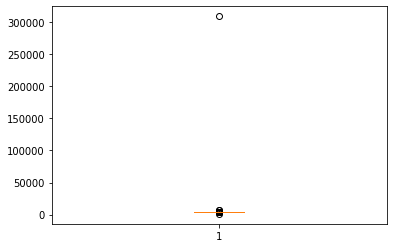

In [9]:
pyplot.boxplot(df_raw["AF3"])
pyplot.show()

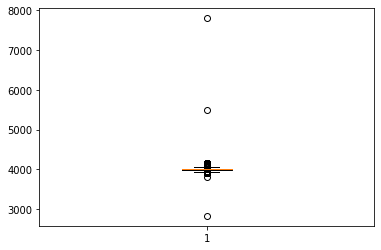

In [10]:
pyplot.boxplot(df_raw["F7"])
pyplot.show()

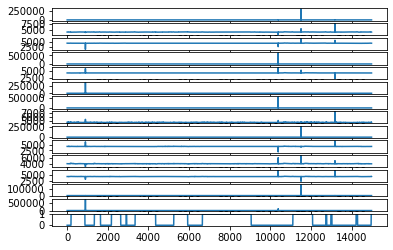

In [11]:
values = df_raw.values
pyplot.figure()
for i in range(values.shape[1]):
	pyplot.subplot(values.shape[1], 1, i+1)
	pyplot.plot(values[:, i])
pyplot.show()

# Outliers

AF3


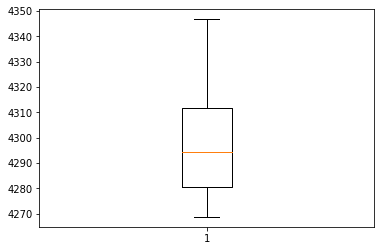

F7


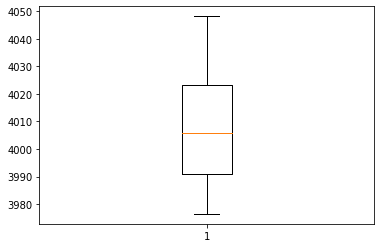

F3


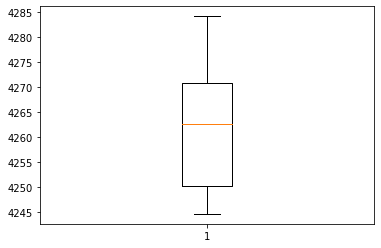

FC5


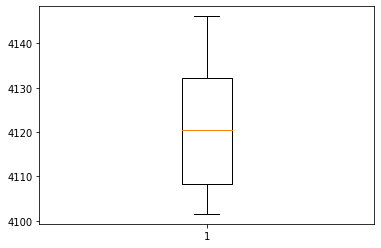

T7


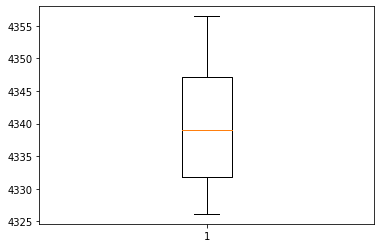

P7


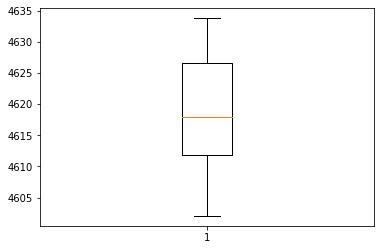

O1


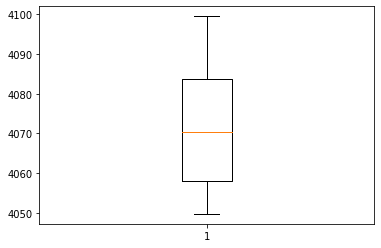

O2


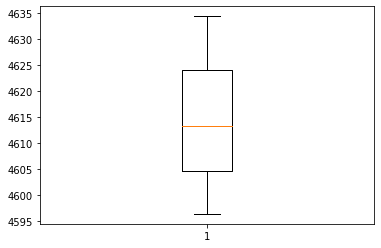

P8


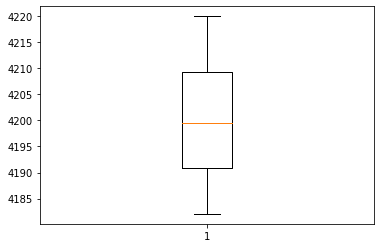

T8


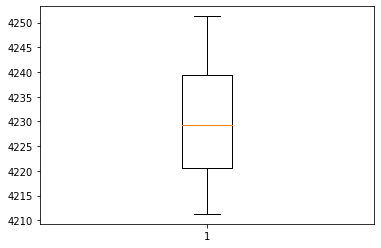

FC6


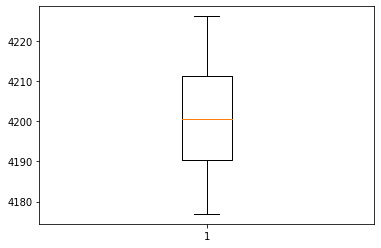

F4


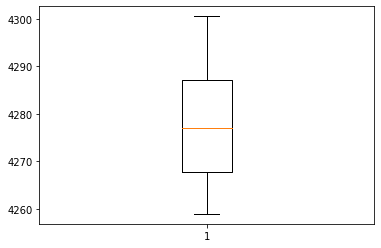

F8


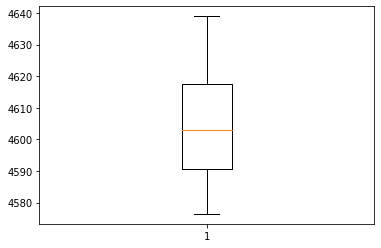

AF4


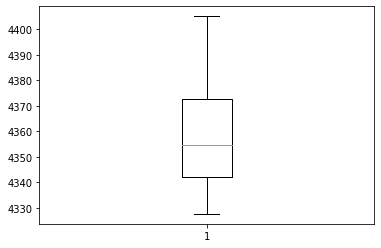

In [12]:
columns = list(df_raw)
for col in columns[0:-1]: 
    print(col)
    
    q1=df_raw[col].quantile(0.10)
    q9=df_raw[col].quantile(0.90)
    
    df_raw[col] = np.where(df_raw[col] > q9, q9, df_raw[col])
    df_raw[col] = np.where(df_raw[col] < q1, q1, df_raw[col])
    pyplot.boxplot(df_raw[col])
    pyplot.show()


In [13]:
df_raw.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4298.690383,4008.142884,4262.432959,4120.968228,4339.797169,4618.399451,4071.754331,4614.416151,4200.195144,4230.174575,4200.906694,4277.920207,4604.714086,4359.328055,0.448798
std,23.412838,22.192181,12.674076,14.163704,9.629562,9.948019,15.865246,12.109806,11.915825,12.514546,15.159389,12.993495,18.979171,23.224522,0.497388
min,4268.720000,3976.410000,4244.620000,4101.540000,4326.150000,4602.050000,4049.740000,4596.410000,4182.050000,4211.280000,4176.920000,4258.970000,4576.410000,4327.690000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,4346.670000,4048.210000,4284.100000,4146.150000,4356.461000,4633.850000,4099.490000,4634.360000,4220.000000,4251.280000,4226.150000,4300.510000,4638.970000,4405.130000,1.000000


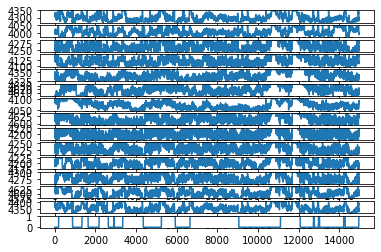

In [14]:
values = df_raw.values
pyplot.figure()
for i in range(values.shape[1]):
	pyplot.subplot(values.shape[1], 1, i+1)
	pyplot.plot(values[:, i])
pyplot.show()

In [15]:
# We create a new CSV file after removing outliers
df_raw.to_csv('EEG_without_outliers.csv', index=False)

In [16]:
df = pd.read_csv("EEG_without_outliers.csv")

# Normalization

In [17]:
def normalize(dataset):   # min-max normalization by setting min=0 and max=1
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*1
    dataNorm["eyeDetection"]=dataset["eyeDetection"]
    return dataNorm

In [18]:
df=normalize(df)
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,0.384482,0.441962,0.451189,0.435513,0.450238,0.514134,0.442499,0.474470,0.478133,0.472364,0.487237,0.456192,0.452431,0.408549,0.448798
std,0.300357,0.309083,0.321025,0.317501,0.317692,0.312831,0.318899,0.319099,0.313987,0.312864,0.307930,0.312795,0.303376,0.299903,0.497388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151251,0.200000,0.142857,0.149518,0.186071,0.306289,0.165025,0.216337,0.229776,0.230750,0.270973,0.209918,0.229540,0.185434,0.000000
50%,0.328929,0.407103,0.454407,0.425241,0.422949,0.500000,0.412462,0.445850,0.459552,0.448750,0.479179,0.432114,0.426311,0.350981,0.000000
75%,0.552534,0.650000,0.662361,0.689756,0.693808,0.774214,0.680402,0.729644,0.716206,0.705250,0.697948,0.679104,0.655850,0.582774,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


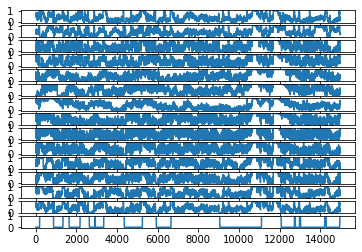

In [19]:
values = df.values
pyplot.figure()
for i in range(values.shape[1]):
	pyplot.subplot(values.shape[1], 1, i+1)
	pyplot.plot(values[:, i])
pyplot.show()

In [20]:
# We create a new CSV file after normalization process
df.to_csv('EEG_after_preprocessing.csv', index=False)

In [21]:
dataset = pd.read_csv("EEG_after_preprocessing.csv")
dataset.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,0.384482,0.441962,0.451189,0.435513,0.450238,0.514134,0.442499,0.474470,0.478133,0.472364,0.487237,0.456192,0.452431,0.408549,0.448798
std,0.300357,0.309083,0.321025,0.317501,0.317692,0.312831,0.318899,0.319099,0.313987,0.312864,0.307930,0.312795,0.303376,0.299903,0.497388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151251,0.200000,0.142857,0.149518,0.186071,0.306289,0.165025,0.216337,0.229776,0.230750,0.270973,0.209918,0.229540,0.185434,0.000000
50%,0.328929,0.407103,0.454407,0.425241,0.422949,0.500000,0.412462,0.445850,0.459552,0.448750,0.479179,0.432114,0.426311,0.350981,0.000000
75%,0.552534,0.650000,0.662361,0.689756,0.693808,0.774214,0.680402,0.729644,0.716206,0.705250,0.697948,0.679104,0.655850,0.582774,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
X = dataset.drop('eyeDetection', axis=1) 
y = dataset['eyeDetection']

In [23]:
# Splitting data with holdout method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

# Implementations of Classification Models

In [24]:
#gain ratio implementation (holdout method)
start = timeit.default_timer()
gainModel = DecisionTreeClassifier(criterion="entropy")
gainModel.fit(X_train, y_train)
y_predict = gainModel.predict(X_test)
gain_accuracy=accuracy_score(y_test, y_predict)
stop = timeit.default_timer()

print("Confusion matrix for Decision tree with Gain Ratio: \n",confusion_matrix(y_test, y_predict))
print("\nAccuracy Score for Gain Ratio:\n",gain_accuracy )
print("\nClassification report for Gain Ratio: \n", classification_report(y_test, y_predict))
print('Runtime for Gain Ratio(Holdout Method): ', stop - start)

Confusion matrix for Decision tree with Gain Ratio: 
 [[1414  247]
 [ 272 1063]]

Accuracy Score for Gain Ratio:
 0.8267690253671562

Classification report for Gain Ratio: 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1661
           1       0.81      0.80      0.80      1335

    accuracy                           0.83      2996
   macro avg       0.83      0.82      0.82      2996
weighted avg       0.83      0.83      0.83      2996

Runtime for Gain Ratio(Holdout Method):  0.10361036699999815


In [25]:
#gini index implementation (holdout method)
start = timeit.default_timer()
giniModel = DecisionTreeClassifier()
giniModel.fit(X_train, y_train)
y_predict = giniModel.predict(X_test)
gini_accuracy=accuracy_score(y_test, y_predict)
stop = timeit.default_timer()


print("Confusion matrix for Decision tree with Gini Index: \n",confusion_matrix(y_test, y_predict))
print("\nAccuracy Score for Gini Index:\n", gini_accuracy)
print("\nClassification report for Gini: \n", classification_report(y_test, y_predict))
print('Runtime for Gini Index(Holdout Method): ', stop - start)

Confusion matrix for Decision tree with Gini Index: 
 [[1404  257]
 [ 241 1094]]

Accuracy Score for Gini Index:
 0.8337783711615487

Classification report for Gini: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1661
           1       0.81      0.82      0.81      1335

    accuracy                           0.83      2996
   macro avg       0.83      0.83      0.83      2996
weighted avg       0.83      0.83      0.83      2996

Runtime for Gini Index(Holdout Method):  0.09241177299999848


In [26]:
#gaussian naive bayes implementation (holdout method)
start = timeit.default_timer()
naiveBayesModel = GaussianNB()
naiveBayesModel.fit(X_train, y_train)
y_predict =naiveBayesModel.predict(X_test)
bayes_accuracy=accuracy_score(y_test, y_predict)
stop = timeit.default_timer()

print("Confusion matrix for Naive Bayes: \n",confusion_matrix(y_test, y_predict))
print("\nAccuracy  for Naive Bayes:\n",bayes_accuracy )
print("\nClassification report for Naive Bayes: \n", classification_report(y_test, y_predict))
print('Runtime for Naive Bayes(Holdout Method): ', stop - start)


Confusion matrix for Naive Bayes: 
 [[1241  420]
 [ 725  610]]

Accuracy  for Naive Bayes:
 0.6178237650200267

Classification report for Naive Bayes: 
               precision    recall  f1-score   support

           0       0.63      0.75      0.68      1661
           1       0.59      0.46      0.52      1335

    accuracy                           0.62      2996
   macro avg       0.61      0.60      0.60      2996
weighted avg       0.61      0.62      0.61      2996

Runtime for Naive Bayes(Holdout Method):  0.017821846000000363


In [27]:
# Artificial Neural Network with 1 hidden layer implementation (holdout method) 
#define the keras model
start = timeit.default_timer()
annOneHiddenLayer= Sequential()
annOneHiddenLayer.add(Dense(10, input_dim=14, activation='relu'))
annOneHiddenLayer.add(Dense(1, activation='sigmoid'))
# compile the keras model
annOneHiddenLayer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
annOneHiddenLayer.fit(X_train, y_train, epochs=10, batch_size=10)



Epoch 1/10
11984/11984 [==============================] - 3s 254us/step - loss: 0.6640 - accuracy: 0.5850
Epoch 2/10
11984/11984 [==============================] - 2s 191us/step - loss: 0.6232 - accuracy: 0.6563
Epoch 3/10
11984/11984 [==============================] - 2s 200us/step - loss: 0.6013 - accuracy: 0.6798
Epoch 4/10
11984/11984 [==============================] - 3s 265us/step - loss: 0.5833 - accuracy: 0.6959
Epoch 5/10
11984/11984 [==============================] - 3s 253us/step - loss: 0.5692 - accuracy: 0.7038
Epoch 6/10
11984/11984 [==============================] - 4s 294us/step - loss: 0.5570 - accuracy: 0.7104
Epoch 7/10
11984/11984 [==============================] - 3s 218us/step - loss: 0.5478 - accuracy: 0.7173
Epoch 8/10
11984/11984 [==============================] - 3s 244us/step - loss: 0.5391 - accuracy: 0.7276
Epoch 9/10
11984/11984 [==============================] - 5s 397us/step - loss: 0.5313 - accuracy: 0.73360s - loss: 0.5318 - accuracy
Epoch 10/10
11984/

In [28]:
# evaluate the keras model
_, ann_one_hidden_layer_accuracy = annOneHiddenLayer.evaluate(X_test, y_test)
stop = timeit.default_timer()
print('Accuracy score for artificial neural network with one hidden layer: %.2f' % (ann_one_hidden_layer_accuracy*100))
print('Runtime for ANN with 1 hidden layer(Holdout Method): ', stop - start)



2996/2996 [==============================] - 0s 60us/step
Accuracy score for artificial neural network with one hidden layer: 74.77
Runtime for ANN with 1 hidden layer(Holdout Method):  32.257663395


In [29]:
# Artificial Neural Network with 2 hidden layer implementation (holdout method)
#define the keras model with holdout method
start = timeit.default_timer()
annTwoHiddenLayer = Sequential()
annTwoHiddenLayer.add(Dense(10, input_dim=14, activation='relu'))
annTwoHiddenLayer.add(Dense(7, activation='relu'))
annTwoHiddenLayer.add(Dense(1, activation='sigmoid'))
# compile the keras model
annTwoHiddenLayer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
annTwoHiddenLayer.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
11984/11984 [==============================] - 4s 296us/step - loss: 0.6550 - accuracy: 0.6081
Epoch 2/10
11984/11984 [==============================] - 4s 332us/step - loss: 0.5936 - accuracy: 0.6814
Epoch 3/10
11984/11984 [==============================] - 3s 282us/step - loss: 0.5525 - accuracy: 0.7222
Epoch 4/10
11984/11984 [==============================] - 3s 261us/step - loss: 0.5184 - accuracy: 0.7471
Epoch 5/10
11984/11984 [==============================] - 3s 244us/step - loss: 0.4913 - accuracy: 0.7601
Epoch 6/10
11984/11984 [==============================] - 3s 268us/step - loss: 0.4737 - accuracy: 0.7687
Epoch 7/10
11984/11984 [==============================] - 5s 401us/step - loss: 0.4590 - accuracy: 0.7782
Epoch 8/10
11984/11984 [==============================] - 4s 311us/step - loss: 0.4466 - accuracy: 0.7885
Epoch 9/10
11984/11984 [==============================] - 3s 281us/step - loss: 0.4398 - accuracy: 0.7919
Epoch 10/10
11984/11984 [=====================

In [30]:
# evaluate the keras model

_, ann_two_hidden_layer_accuracy = annTwoHiddenLayer.evaluate(X_test, y_test)
stop = timeit.default_timer()
print('Accuracy score for artificial neural network with two hidden layer: %.2f' % (ann_two_hidden_layer_accuracy*100))
print('Runtime for ANN with 2 hidden layer(Holdout Method): ', stop - start)

2996/2996 [==============================] - 0s 98us/step
Accuracy score for artificial neural network with two hidden layer: 81.58
Runtime for ANN with 2 hidden layer(Holdout Method):  36.616673515


In [31]:
#SVM implementation (holdout method)
start = timeit.default_timer()
svmModel = SVC(probability=True, gamma='scale', kernel='poly')
svmModel.fit(X_train, y_train)
y_predict = svmModel.predict(X_test)
svm_accuracy=accuracy_score(y_test, y_predict)
stop = timeit.default_timer()

print("Confusion matrix for Support Vector Machine: \n",confusion_matrix(y_test, y_predict))
print("\nAccuracy score for Support Vector Machine:\n", svm_accuracy)
print("\nClassification report for Support Vector Machine: \n", classification_report(y_test, y_predict))
print('Runtime for Support Vector Machine(Holdout Method): ', stop - start)


Confusion matrix for Support Vector Machine: 
 [[1549  112]
 [ 295 1040]]

Accuracy score for Support Vector Machine:
 0.8641522029372497

Classification report for Support Vector Machine: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1661
           1       0.90      0.78      0.84      1335

    accuracy                           0.86      2996
   macro avg       0.87      0.86      0.86      2996
weighted avg       0.87      0.86      0.86      2996

Runtime for Support Vector Machine(Holdout Method):  34.705351973000006


In [32]:
#Arrays to hold accuracy values
classifier_base_accuracy=[gain_accuracy,gini_accuracy,bayes_accuracy,ann_one_hidden_layer_accuracy,ann_two_hidden_layer_accuracy,svm_accuracy]
gain_accu=[gain_accuracy,0,0]
gini_accu=[gini_accuracy,0,0]
bayes_accu=[bayes_accuracy,0,0,0]
ann1_accu=[ann_one_hidden_layer_accuracy,0,0]
ann2_accu=[ann_two_hidden_layer_accuracy,0,0]
svm_accu=[svm_accuracy,0,0]

# Cross-Validation

In [33]:
start = timeit.default_timer()
kfold = KFold(5, True)
accuracy_scores=[]
for train, test in kfold.split(X,y):
    X_train, X_test, y_train, y_test = X.loc[train],X.loc[test],y.loc[train],y.loc[test]
    naiveBayesModel.fit(X_train, y_train)
    y_predict = naiveBayesModel.predict(X_test)
    accuracy=accuracy_score(y_test, y_predict)
    print("Confusion matrix for Naive Bayes: \n",confusion_matrix(y_test, y_predict))
    print("\nAccuracy score for Naive Bayes:\n", accuracy)
    print("\nClassification report for Naive Bayes: \n", classification_report(y_test, y_predict))
    accuracy_scores.append(accuracy)
stop = timeit.default_timer()
print('Average accuracy score on cross validation for Naive Bayes:' ,np.mean(accuracy_scores))



Confusion matrix for Naive Bayes: 
 [[1202  457]
 [ 767  570]]

Accuracy score for Naive Bayes:
 0.5914552736982643

Classification report for Naive Bayes: 
               precision    recall  f1-score   support

           0       0.61      0.72      0.66      1659
           1       0.56      0.43      0.48      1337

    accuracy                           0.59      2996
   macro avg       0.58      0.58      0.57      2996
weighted avg       0.59      0.59      0.58      2996

Confusion matrix for Naive Bayes: 
 [[1168  478]
 [ 734  616]]

Accuracy score for Naive Bayes:
 0.595460614152203

Classification report for Naive Bayes: 
               precision    recall  f1-score   support

           0       0.61      0.71      0.66      1646
           1       0.56      0.46      0.50      1350

    accuracy                           0.60      2996
   macro avg       0.59      0.58      0.58      2996
weighted avg       0.59      0.60      0.59      2996

Confusion matrix for Naive Baye

In [34]:
print('Average accuracy score on cross validation for Naive Bayes:' ,np.mean(accuracy_scores))
print('Runtime for Naive Bayes(Cross Validation Method): ', stop - start)
bayes_accu[1]=(np.mean(accuracy_scores))

Average accuracy score on cross validation for Naive Bayes: 0.6021361815754338
Runtime for Naive Bayes(Cross Validation Method):  0.24245010300001013


# Bagging Implementations

In [35]:
#bagging for Gain Ratio
start = timeit.default_timer()
bgGain = BaggingClassifier(gainModel, max_features = 1.0, n_estimators = 50)
bgGain.fit(X_train, y_train)
score = bgGain.score(X_test, y_test)
print('Accuracy of bagging for Gain Ratio: ', score)
bg_pred = bgGain.predict(X_test)
stop = timeit.default_timer()
print('Confusion matrix of bagging for Gain Ratio\n: ', confusion_matrix(y_test, bg_pred))
print("Classification report for Gain Ratio: \n", classification_report(y_test, bg_pred))
print('Runtime for Gain Ratio(Bagging Method): ', stop - start)
gain_accu[1]=score


Accuracy of bagging for Gain Ratio:  0.9072096128170895
Confusion matrix of bagging for Gain Ratio
:  [[1607   89]
 [ 189 1111]]
Classification report for Gain Ratio: 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1696
           1       0.93      0.85      0.89      1300

    accuracy                           0.91      2996
   macro avg       0.91      0.90      0.90      2996
weighted avg       0.91      0.91      0.91      2996

Runtime for Gain Ratio(Bagging Method):  3.9116551950000087


In [36]:
#bagging for Gini Index
start = timeit.default_timer()
bgGini = BaggingClassifier(giniModel, max_features = 1.0, n_estimators = 20)
bgGini.fit(X_train, y_train)
score = bgGini.score(X_test, y_test)
bg_pred = bgGini.predict(X_test)
stop = timeit.default_timer()
print('Accuracy of bagging for Gini Index: ', score)
print('Confusion matrix of bagging for Gini Index\n: ', confusion_matrix(y_test, bg_pred))
print("Classification report for Gini Index: \n", classification_report(y_test, bg_pred))
print('Runtime for Gini Index(Bagging Method): ', stop - start)
gini_accu[1]=score

Accuracy of bagging for Gini Index:  0.8951935914552737
Confusion matrix of bagging for Gini Index
:  [[1595  101]
 [ 213 1087]]
Classification report for Gini Index: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1696
           1       0.91      0.84      0.87      1300

    accuracy                           0.90      2996
   macro avg       0.90      0.89      0.89      2996
weighted avg       0.90      0.90      0.89      2996

Runtime for Gini Index(Bagging Method):  1.2713160659999971


In [37]:
#bagging for GaussianNB
start = timeit.default_timer()
bgBayes = BaggingClassifier(naiveBayesModel, n_estimators = 20, max_features = 1.0)
bgBayes.fit(X_train, y_train)
score = bgBayes.score(X_test, y_test)

bg_pred = bgBayes.predict(X_test)
stop = timeit.default_timer()
print('Accuracy of bagging for Naive Bayes: ', score)
print('\nConfusion matrix of bagging for Naive Bayes\n: ', confusion_matrix(y_test, bg_pred))
print("\nClassification report for Naive Bayes: \n", classification_report(y_test, bg_pred))
print('Runtime for Naive Bayes(Bagging Method): ', stop - start)
bayes_accu[2]=score

Accuracy of bagging for Naive Bayes:  0.6178237650200267

Confusion matrix of bagging for Naive Bayes
:  [[1259  437]
 [ 708  592]]

Classification report for Naive Bayes: 
               precision    recall  f1-score   support

           0       0.64      0.74      0.69      1696
           1       0.58      0.46      0.51      1300

    accuracy                           0.62      2996
   macro avg       0.61      0.60      0.60      2996
weighted avg       0.61      0.62      0.61      2996

Runtime for Naive Bayes(Bagging Method):  0.11806259499999783


In [38]:
#bagging for ANN with 1 hidden layer
start = timeit.default_timer()
ann1hidden=annOneHiddenLayer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bgAnnOneHiddenLayer = BaggingClassifier(ann1hidden, n_estimators = 50, max_features = 1.0)
bgAnnOneHiddenLayer.fit(X_train, y_train)
score = bgAnnOneHiddenLayer.score(X_test, y_test)

bg_pred = bgAnnOneHiddenLayer.predict(X_test)
stop = timeit.default_timer()
print('Accuracy of bagging for Ann: ', score)
print('\nConfusion matrix of bagging for Ann: \n', confusion_matrix(y_test, bg_pred))
print("\nClassification report for Ann: \n", classification_report(y_test, bg_pred))
print('Runtime for ANN with 1 hidden layer (Bagging Method): ', stop - start)
ann1_accu[1]=score

Accuracy of bagging for Ann:  0.9028704939919893

Confusion matrix of bagging for Ann: 
 [[1602   94]
 [ 197 1103]]

Classification report for Ann: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1696
           1       0.92      0.85      0.88      1300

    accuracy                           0.90      2996
   macro avg       0.91      0.90      0.90      2996
weighted avg       0.90      0.90      0.90      2996

Runtime for ANN with 1 hidden layer (Bagging Method):  3.0321768729999974


In [39]:
#bagging for ANN with 2 hidden layer
start = timeit.default_timer()
annTwoHiddenLayer = Sequential()
annTwoHiddenLayer.add(Dense(10, input_dim=14, activation='relu'))
annTwoHiddenLayer.add(Dense(7, activation='relu'))
annTwoHiddenLayer.add(Dense(1, activation='sigmoid'))
ann2hidden=annTwoHiddenLayer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bgAnnTwoHiddenLayer = BaggingClassifier(ann2hidden, n_estimators = 50, max_features = 1.0)
bgAnnTwoHiddenLayer.fit(X_train, y_train)
score = bgAnnTwoHiddenLayer.score(X_test, y_test)

bg_pred = bgAnnTwoHiddenLayer.predict(X_test)
stop = timeit.default_timer()
print('Accuracy of bagging for Ann2: ', score)
print('\nConfusion matrix of bagging for Ann2: \n', confusion_matrix(y_test, bg_pred))
print("\nClassification report for Ann2: \n", classification_report(y_test, bg_pred))
print('Runtime for ANN with 2 hidden layer (Bagging Method): ', stop - start)
ann2_accu[1]=score

Accuracy of bagging for Ann2:  0.9062082777036048

Confusion matrix of bagging for Ann2: 
 [[1602   94]
 [ 187 1113]]

Classification report for Ann2: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1696
           1       0.92      0.86      0.89      1300

    accuracy                           0.91      2996
   macro avg       0.91      0.90      0.90      2996
weighted avg       0.91      0.91      0.91      2996

Runtime for ANN with 2 hidden layer (Bagging Method):  3.1734188609999876


In [40]:
#bagging for SVM
start = timeit.default_timer()
bgSVM = BaggingClassifier(svmModel, n_estimators = 20, max_features = 1.0)
bgSVM.fit(X_train, y_train)
score = bgSVM.score(X_test, y_test)

bg_pred = bgSVM.predict(X_test)
stop = timeit.default_timer()
print('Accuracy of bagging for SVM: ', score)
print('\nConfusion matrix of bagging for SVM:\n ', confusion_matrix(y_test, bg_pred))
print("\nClassification report for SVM: \n", classification_report(y_test, bg_pred))
print('Runtime for SVM (Bagging Method): ', stop - start)
svm_accu[1]=score

Accuracy of bagging for SVM:  0.8731642189586115

Confusion matrix of bagging for SVM:
  [[1576  120]
 [ 260 1040]]

Classification report for SVM: 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      1696
           1       0.90      0.80      0.85      1300

    accuracy                           0.87      2996
   macro avg       0.88      0.86      0.87      2996
weighted avg       0.87      0.87      0.87      2996

Runtime for SVM (Bagging Method):  295.602964629


# Boosting Implementations

In [41]:
#boosting for Gain Ratio
start = timeit.default_timer()
adbGain = AdaBoostClassifier(gainModel, n_estimators = 50, learning_rate = 0.01)
adbGain.fit(X_train, y_train)
score = adbGain.score(X_test, y_test)

bg_pred = adbGain.predict(X_test)
stop = timeit.default_timer()
print('Accuracy of boosting for Gain Ratio: ', score)
print('\nConfusion matrix of boosting for Gain Ratio: \n', confusion_matrix(y_test, bg_pred))
print("\nClassification report for Gain Ratio: \n", classification_report(y_test, bg_pred))
print('Runtime for Gain Ratio (Boosting Method): ', stop - start)
gain_accu[2]=score

Accuracy of boosting for Gain Ratio:  0.8678237650200267

Confusion matrix of boosting for Gain Ratio: 
 [[1524  172]
 [ 224 1076]]

Classification report for Gain Ratio: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      1696
           1       0.86      0.83      0.84      1300

    accuracy                           0.87      2996
   macro avg       0.87      0.86      0.86      2996
weighted avg       0.87      0.87      0.87      2996

Runtime for Gain Ratio (Boosting Method):  5.633132063000005


In [42]:
#boosting for Gini Index
start = timeit.default_timer()
adbGini = AdaBoostClassifier(giniModel, n_estimators = 10, learning_rate = 1)
adbGini.fit(X_train, y_train)
score = adbGini.score(X_test, y_test)

bg_pred = adbGini.predict(X_test)
stop = timeit.default_timer()
print('Accuracy of boosting for Gini Index: ', score)
print('\nConfusion matrix of boosting for Gini Index\n: ', confusion_matrix(y_test, bg_pred))
print("\nClassification report for Gini Index: \n", classification_report(y_test, bg_pred))
print('Runtime for Gini Index (Boosting Method): ', stop - start)
gini_accu[2]=score

Accuracy of boosting for Gini Index:  0.8768357810413885

Confusion matrix of boosting for Gini Index
:  [[1553  143]
 [ 226 1074]]

Classification report for Gini Index: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      1696
           1       0.88      0.83      0.85      1300

    accuracy                           0.88      2996
   macro avg       0.88      0.87      0.87      2996
weighted avg       0.88      0.88      0.88      2996

Runtime for Gini Index (Boosting Method):  2.0387563890000138


In [43]:
#boosting for GaussianNB

ne = [10 , 50 , 100 , 500]
lr = [0.0001, 0.001, 0.01, 0.1, 1.0]
max_val = 0
max_x = 0;
max_y = 0;
for x in ne:
    for y in lr: 
        adbBayes = AdaBoostClassifier(naiveBayesModel, n_estimators = x, learning_rate = y)
        adbBayes.fit(X_train, y_train)
        score = adbBayes.score(X_test, y_test)
        if score > max_val:
            max_val = score
            max_x = x
            max_y = y
            bg_pred = adbBayes.predict(X_test)
           
print('Accuracy score of boosting for Naive Bayes: ',max_val)
print('Estimator value is: ', x)
print('Learning rate value is: ', y)

      

Accuracy score of boosting for Naive Bayes:  0.7109479305740988
Estimator value is:  500
Learning rate value is:  1.0


In [44]:
#boosting fo naiveBayesModel
start = timeit.default_timer()
adbBayes = AdaBoostClassifier(naiveBayesModel, n_estimators = 500, learning_rate = 1.0)
adbBayes.fit(X_train, y_train)
score = adbBayes.score(X_test, y_test)
bg_pred = adbBayes.predict(X_test)
stop = timeit.default_timer() 

print('Accuracy of boosting for NaiveBayes: ', score)
print('\nConfusion matrix of boosting for NaiveBayes:\n ', confusion_matrix(y_test, bg_pred))
print("\nClassification report for Gini NaiveBayes: \n", classification_report(y_test, bg_pred))
print('Runtime for Naive Bayes (Boosting Method): ', stop - start)
bayes_accu[3]=score 

Accuracy of boosting for NaiveBayes:  0.5761014686248331

Confusion matrix of boosting for NaiveBayes:
  [[1069  627]
 [ 643  657]]

Classification report for Gini NaiveBayes: 
               precision    recall  f1-score   support

           0       0.62      0.63      0.63      1696
           1       0.51      0.51      0.51      1300

    accuracy                           0.58      2996
   macro avg       0.57      0.57      0.57      2996
weighted avg       0.58      0.58      0.58      2996

Runtime for Naive Bayes (Boosting Method):  5.046764182000004


In [45]:
#boosting for for ANN with 1 hidden layer
start = timeit.default_timer()
ann1hidden=annOneHiddenLayer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
adbAnnOneHiddenLayer = AdaBoostClassifier(ann1hidden, n_estimators = 10, learning_rate = 1)
adbAnnOneHiddenLayer.fit(X_train, y_train)
score=adbAnnOneHiddenLayer.score(X_test, y_test)
stop = timeit.default_timer()
ann1_accu[2]=score
print('Accuracy of boosting for Artficial Neural Network with 1 hidden layer: ', score)
print('Runtime for Artficial Neural Network with 2 hidden layer (Boosting Method): ', stop - start)

Accuracy of boosting for Artficial Neural Network with 1 hidden layer:  0.6769025367156208
Runtime for Artficial Neural Network with 2 hidden layer (Boosting Method):  0.1466102730000216


In [46]:
#boosting for for ANN with 2 hidden layer
start = timeit.default_timer()
ann2hidden=annTwoHiddenLayer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
adbAnnTwoHiddenLayer = AdaBoostClassifier(ann2hidden, n_estimators = 10, learning_rate = 1)
adbAnnTwoHiddenLayer.fit(X_train, y_train)
score=adbAnnTwoHiddenLayer.score(X_test, y_test)
stop = timeit.default_timer()
ann2_accu[2]=score
print('Accuracy of boosting for Artficial Neural Network with 2 hidden layer: ', score)
print('Runtime for Artficial Neural Network with 2 hidden layer (Boosting Method): ', stop - start)

Accuracy of boosting for Artficial Neural Network with 2 hidden layer:  0.6769025367156208
Runtime for Artficial Neural Network with 2 hidden layer (Boosting Method):  0.14107369999999264


In [47]:
#boosting for SVM
start = timeit.default_timer()
adbSVM=AdaBoostClassifier(algorithm='SAMME.R',base_estimator=SVC(gamma = 'scale', probability=True,random_state=1),learning_rate = 1 ,n_estimators=10)
adbSVM.fit(X_train, y_train)
y_predict = adbSVM.predict(X_test)
score=accuracy_score(y_test,y_predict)

print ('Accuracy of boosting for Support Vector Machine',score)
stop = timeit.default_timer()
print('Runtime for SVM (Boosting Method): ', stop - start)
svm_accu[2]=score

Accuracy of boosting for Support Vector Machine 0.7403204272363151
Runtime for SVM (Boosting Method):  438.054911858


# Bar Graph of Classifiers

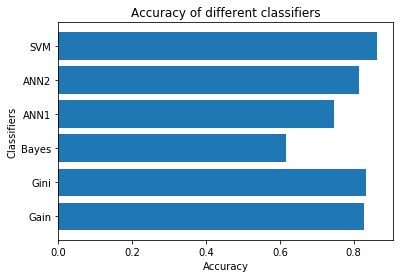

In [48]:
x = ['Gain', 'Gini', 'Bayes', 'ANN1', 'ANN2', 'SVM']
x_pos = [i for i, _ in enumerate(x)]

pyplot.barh(x_pos, classifier_base_accuracy)
pyplot.ylabel("Classifiers")
pyplot.xlabel("Accuracy")
pyplot.title("Accuracy of different classifiers")

pyplot.yticks(x_pos, x)

pyplot.show()

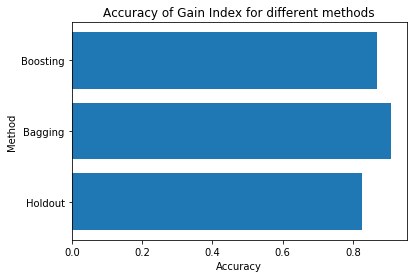

In [49]:
#Gain
x=['Holdout','Bagging','Boosting']
x_pos = [i for i, _ in enumerate(x)]

pyplot.barh(x_pos, gain_accu)
pyplot.ylabel("Method")
pyplot.xlabel("Accuracy")
pyplot.title("Accuracy of Gain Index for different methods")

pyplot.yticks(x_pos, x)

pyplot.show()

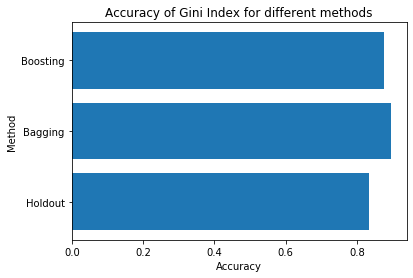

In [50]:
#Gini
x=['Holdout','Bagging','Boosting']
x_pos = [i for i, _ in enumerate(x)]

pyplot.barh(x_pos, gini_accu)
pyplot.ylabel("Method")
pyplot.xlabel("Accuracy")
pyplot.title("Accuracy of Gini Index for different methods")

pyplot.yticks(x_pos, x)

pyplot.show()

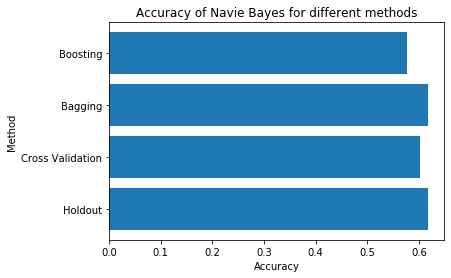

In [51]:
#Bayes
x=['Holdout','Cross Validation','Bagging','Boosting']
x_pos = [i for i, _ in enumerate(x)]

pyplot.barh(x_pos, bayes_accu)
pyplot.ylabel("Method")
pyplot.xlabel("Accuracy")
pyplot.title("Accuracy of Navie Bayes for different methods")

pyplot.yticks(x_pos, x)

pyplot.show()

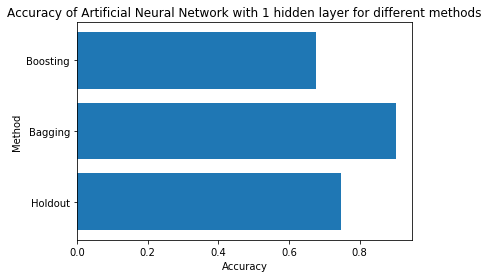

In [52]:
#ANN1
x=['Holdout','Bagging','Boosting']
x_pos = [i for i, _ in enumerate(x)]

pyplot.barh(x_pos,ann1_accu)
pyplot.ylabel("Method")
pyplot.xlabel("Accuracy")
pyplot.title("Accuracy of Artificial Neural Network with 1 hidden layer for different methods")

pyplot.yticks(x_pos, x)

pyplot.show()

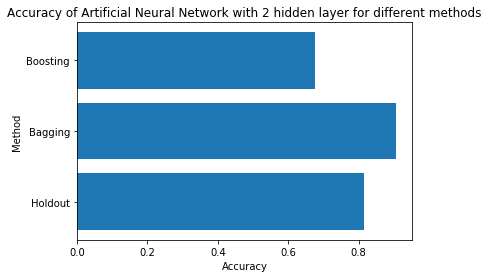

In [53]:
#ANN2
x=['Holdout','Bagging','Boosting']
x_pos = [i for i, _ in enumerate(x)]

pyplot.barh(x_pos, ann2_accu)
pyplot.ylabel("Method")
pyplot.xlabel("Accuracy")
pyplot.title("Accuracy of Artificial Neural Network with 2 hidden layer for different methods")

pyplot.yticks(x_pos, x)

pyplot.show()

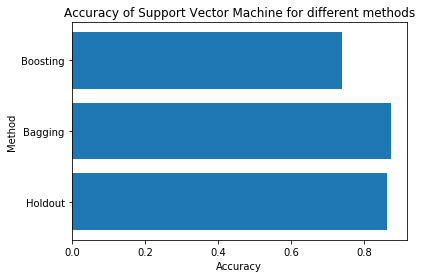

In [54]:
#SVM
x=['Holdout','Bagging','Boosting']
x_pos = [i for i, _ in enumerate(x)]

pyplot.barh(x_pos, svm_accu)
pyplot.ylabel("Method")
pyplot.xlabel("Accuracy")
pyplot.title("Accuracy of Support Vector Machine for different methods")

pyplot.yticks(x_pos, x)

pyplot.show()